In [ ]:
#plot from the large numpy file containing lots of runs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import numpy as np
#from tqdm import tqdm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import cm
plt.rcParams.update({'font.size': 14, 'lines.markersize' : 4})
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import sys, os
import time, datetime
from datetime import timedelta
import pandas as pd
sys.path.append('/reg/neh/home/tdd14/modules/cart2pol/cart2pol')
import cart2pol
from cart2pol import PolarRebin
from torchrecon_funcs_cal import *

In [3]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
my_cmap = cm.get_cmap('jet')
xr = np.linspace(0, 1, 2000)
my_cmap = my_cmap(xr)
my_cmap[0:2,-1] = 0
my_cmap = ListedColormap(my_cmap)

In [4]:
def peak_power(EtEt, ts,  gmd):
    EtEt = EtEt/np.sum(EtEt)
    dt_flat = np.trapz(EtEt,1e15*ts)/np.max(EtEt)
    #print(dt_flat)
    PP = gmd/dt_flat
    return PP

In [5]:
def gaus(x, a, mu, sig):
    return a*1/sig/np.sqrt(2*np.pi)*np.exp(-0.5*((x-mu)/sig)**2)


def gaus_fit(t,spec):
    #spec = Et*Et.conj()
    popt, pcov = curve_fit(gaus,t,spec, bounds=([0.1, -50, 0.01], [100, 50, 30]))
    a, mu, sig = popt
    return a, mu, sig #FWHM is 2.355*sig


In [6]:
def FWHM(t, spec): 
    peakMax = np.max(spec)
    indMax = np.where(spec == peakMax)[0] #should be center since rolled
    if len(indMax)>1: indMax = np.max(indMax)
    t1 = 0
    t2 = 0
    
    for i in range(int(len(t)/2)):
        if t2 != 0 and t1 != 0:
            break
        if i < indMax: 
            if spec[i] >= 0.5*peakMax and t1 == 0:
                t1 = t[i]
            if spec[-i] >= 0.5*peakMax and t2 == 0:
                t2 = t[-i]  
    return t2-t1

In [7]:
def FWHM2(t, spec): 
    spec = spec/np.sum(spec)
    peakMax = np.max(spec)
    indMax = np.where(spec == peakMax)[0] 
    if len(indMax)>1: indMax = np.max(indMax)
    else: indMax = indMax[0]
    t1 = 0
    t2 = 0
    ind1 = 0
    ind2 = 0
    
    for i in range(int(len(t))):
        if t2 != 0 and t1 != 0:
            break
        if i < indMax:
            #print(i, np.trapz(spec[-i:]))
            
            if (np.trapz(spec[:i]) >= 0.25) & (t1 == 0):
                t1 = t[i]
                ind1 = i
            elif (np.trapz(spec[-(i+1):]) >= 0.25) & (t2 == 0):
                t2 = t[-(i+1)]  
                ind2 = -(i+1)
    return t2-t1 #, ind1, ind2

In [8]:
# #mdat= np.load('/cds/home/p/paris/reconVMI_clean/recon X510 Dec/Ms_Mar12_112.npy', allow_pickle = True)[()]
# plt.figure(figsize = (8,8))
# plt.pcolormesh(np.rot90(mdat[0]), cmap = 'jet') #3,14,19,22
# phi_rad = np.linspace(0,360,100)*np.pi/180

# plt.plot((32+18.5*np.cos(phi_rad)), (32+18.5*np.sin(phi_rad)), 'r--', alpha = 0.5)


In [10]:
# #mdat= np.load('/cds/home/p/paris/reconVMI_clean/recon X510 Dec/Ms_Mar25_127.npy', allow_pickle = True)[()]
# plt.figure(figsize = (8,8))
# plt.pcolormesh(np.rot90(mdat[25]), cmap = 'jet') #check 23?

In [9]:
#basesdir = '/reg/d/psdm/tmo/tmox51020/results/paris/circularpol_vNbases_dipole_K5/'
basesdir = '/reg/d/psdm/tmo/tmox51020/results/paris/circularpol_vNbases_dipole_Feb/'
PR = PolarRebin('/reg/d/psdm/tmo/tmox51020/results/paris/recon/PR_c32_r32_th32.h5') 


In [304]:
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jan9_hole_noQ_cal_spec_eshift.npy' #run112 extended Up
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb20_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar2_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar3_112_bighole.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar3_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar6_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar6_112+1eV.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar9_112.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar10_110.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar12_112.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar13_121.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar14_121.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar19_124.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar17_123.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar20_123.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar25_127.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar23_125.npy'

#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_May31_127.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar6_112-1eV.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jan19_hole_noQ_cal_spec_eshift_2.npy' #run110
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb1_116.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb2_117.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb3_110.npy'
# fname= '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Feb13_0.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul13_127.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul14_127.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul17_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar10_110.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul18_127.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul18_127_2.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul18_127_3.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul20_127.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul20_127_2.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul21_127.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul21_127_2.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul23_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_May31_127.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul24_112.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul26_127.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul26_127_2.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul26_127_3.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul26_127_4.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul26_127_5.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul27_127.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul27_112.npy'
# #fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul27_112_2.npy' #small hole
# #fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul29_112.npy'
# # fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul30_112_half.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul31_112_half.npy'
# #fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul31_112_half_hole.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul31_112_half_2.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul31_127.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Jul31_112.npy'
# fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug1_127.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug1_127_new.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug3_127.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug5_127.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug8_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug9_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug9_112_vstreaked.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar12_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug10_112_half.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug10_112_half0.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug11_112_half.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar12_112.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug17_131.npy'
#fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug21_131.npy'
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug24_131.npy'

dats = np.load(fname, allow_pickle = True)[()]

In [305]:
dats.keys()

dict_keys(['dat', 'mask', 'mdatname', 'specdatname', 'gfsig', 'eshift', 'sc', 'thresh', 'M_wght', 'Spec_wght', 'Smooth_wght'])

In [306]:
dat = dats['dat']
mask = dats['mask']
mdatname = dats['mdatname']
specdatname = dats['specdatname']
gfsig = dats['gfsig']
eshift = dats['eshift']
sc = dats['sc']
gfcart = 0.25
thresh = dats['thresh'] #0.0005
# M_wght = dats['M_wght']
# Spec_wght= dats['Spec_wght'] 
# Smooth_wght = dats['Smooth_wght'] 
print(mdatname)

/cds/home/p/paris/reconVMI_clean/recon X510 Dec/Ms_Aug21_131.npy


In [307]:
mdat= np.load(mdatname , allow_pickle = True)[()]
specdat = np.load(specdatname, allow_pickle = True)[()]
gds = np.load(mdatname.split('Ms')[-0]+'GDs'+mdatname.split('Ms')[-1],allow_pickle=True)[()]
tmstmp = np.load(mdatname.split('Ms')[-0]+'tmstmps'+mdatname.split('Ms')[-1],allow_pickle=True)[()]

In [308]:
Ups = np.unique(dat['Up'])
print(Ups)

[0.4]


In [297]:
#Upsall = [0, 1.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1.2, 0.8, 1.1]

In [298]:
try: Bps
except:
    Bps = []
    alphas = []
    vNaxiss = []
    alphaws = []
    Bnames = []
    Upsall = []
N_w = 6
N_t = 6
Nb = N_w*N_t
for i in range(len(Ups)):
    Np = 128
    Up = Ups[i]  
    if Up == 0: Up = int(0)
    filename = 'Bpbasis_Np' + str(Np) + '_Nw' + str(N_w) +'_Nt' + str(N_t) + '_Up' + str(Up)+'.npy'
    print(filename)
    if filename in Bnames: continue
    br = np.load(basesdir+filename, allow_pickle=True)
    Breal = br[()]['Breal']
    Bimag = br[()]['Bimag']
    breal = br[()]['breal']
    bimag = br[()]['bimag']
    vNaxis = br[()]['vNaxis']
    alpha = br[()]['alpha']

    
    tempr = np.zeros((Breal.shape[0], 64**2))
    tempi = np.zeros((Breal.shape[0], 64**2))
    for i in range(len(Breal)):
        tempr[i,:] = np.reshape(rebin(np.reshape(Breal[i,:], [128,128])), [64**2])
        tempi[i,:] = np.reshape(rebin(np.reshape(Bimag[i,:], [128,128])), [64**2])

    Breal = tempr
    Bimag = tempi

    alphw = np.zeros(alpha['t_sample'].shape, dtype = complex)
    for i in range(len(alphw)):
        f = interp1d(vNaxis['t_sample'], alpha['t_sample'][i], fill_value = 0, bounds_error = False)
        N = 2801 #1024
        ts = np.linspace(vNaxis['t_sample'][0],-vNaxis['t_sample'][0], N)
        alphw[i] = np.fft.ifftshift(np.fft.ifft(f(ts)))

    Np = 64
    for j in range(Breal.shape[0]):
        temp=np.reshape(Breal[j,:],[Np,Np])
        polimg = PR.cart2pol(temp,32,32)
        bb = np.zeros((64,64))
        bb[1:64,1:64]= PR.pol2cart(scimg.filters.gaussian_filter(polimg,[gfsig,0]))
        Breal[j,:]=np.reshape(bb,newshape=(1,Np**2))
        #temp=scimg.filters.gaussian_filter(temp,0.8889)
        #Bpr[j,:]=Variable(Tensor(np.reshape(temp,newshape=(1,Np**2))))
        temp=np.reshape(Bimag[j,:],[Np,Np])
        polimg = PR.cart2pol(temp,32,32)
        bb = np.zeros((64,64))
        bb[1:64,1:64]= PR.pol2cart(scimg.filters.gaussian_filter(polimg,[gfsig,0]))
        Bimag[j,:]=np.reshape(bb,newshape=(1,Np**2))
        #temp=scimg.filters.gaussian_filter(temp,0.8889)
        #Bpi[j,:]=Variable(Tensor(np.reshape(temp,newshape=(1,Np**2))))

    Bp_basis = Breal+1j*Bimag
    Bnames.append(filename)
    Bps.append(Bp_basis)
    alphas.append(alpha)
    vNaxiss.append(vNaxis)
    alphaws.append(alphw)
    Upsall.append(Up)

Bpbasis_Np128_Nw6_Nt6_Up0.4.npy


In [299]:
dat[(dat['ID'] == IDs[0])&(dat['Up'] == 0.0)]['costs'][:,-1].shape

(0,)

In [300]:
k = 0
l = 0

In [301]:
cost_avg = []
cost_m = []
cost_s = []
us = []
for i,u in enumerate(np.unique(dat[(dat['ID'] == IDs[k*5+l])]['Up'])):
    cost_avg.append(np.mean(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == u)]['costs'][:,-1]))
    cost_m.append(np.mean(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == u)]['costM'][:,-1]))
    cost_s.append(np.mean(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == u)]['costS'][:,-1]))
    us.append(u)
    
uplook = us[np.argmin(cost_avg)]

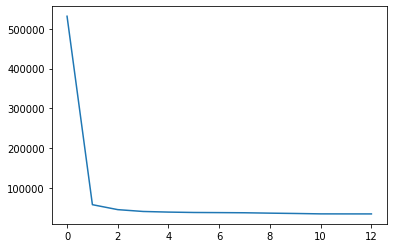

In [302]:
plt.plot(np.mean(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['costs'][:],axis = 0))

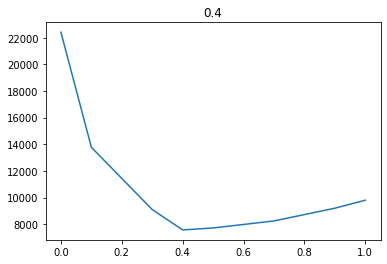

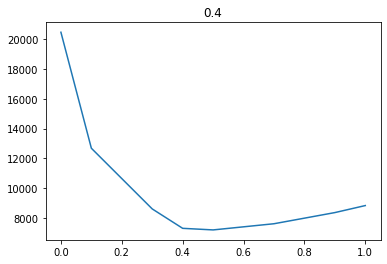

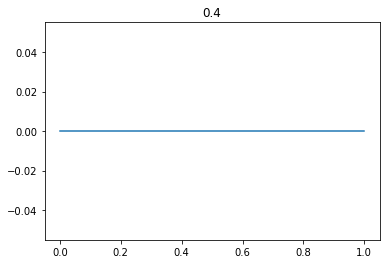

In [71]:
plt.plot(us,cost_avg)
plt.title(uplook)
plt.show()

plt.plot(us,cost_m)
plt.title(uplook)
plt.show()

plt.plot(us,cost_s)
plt.title(uplook)
plt.show()

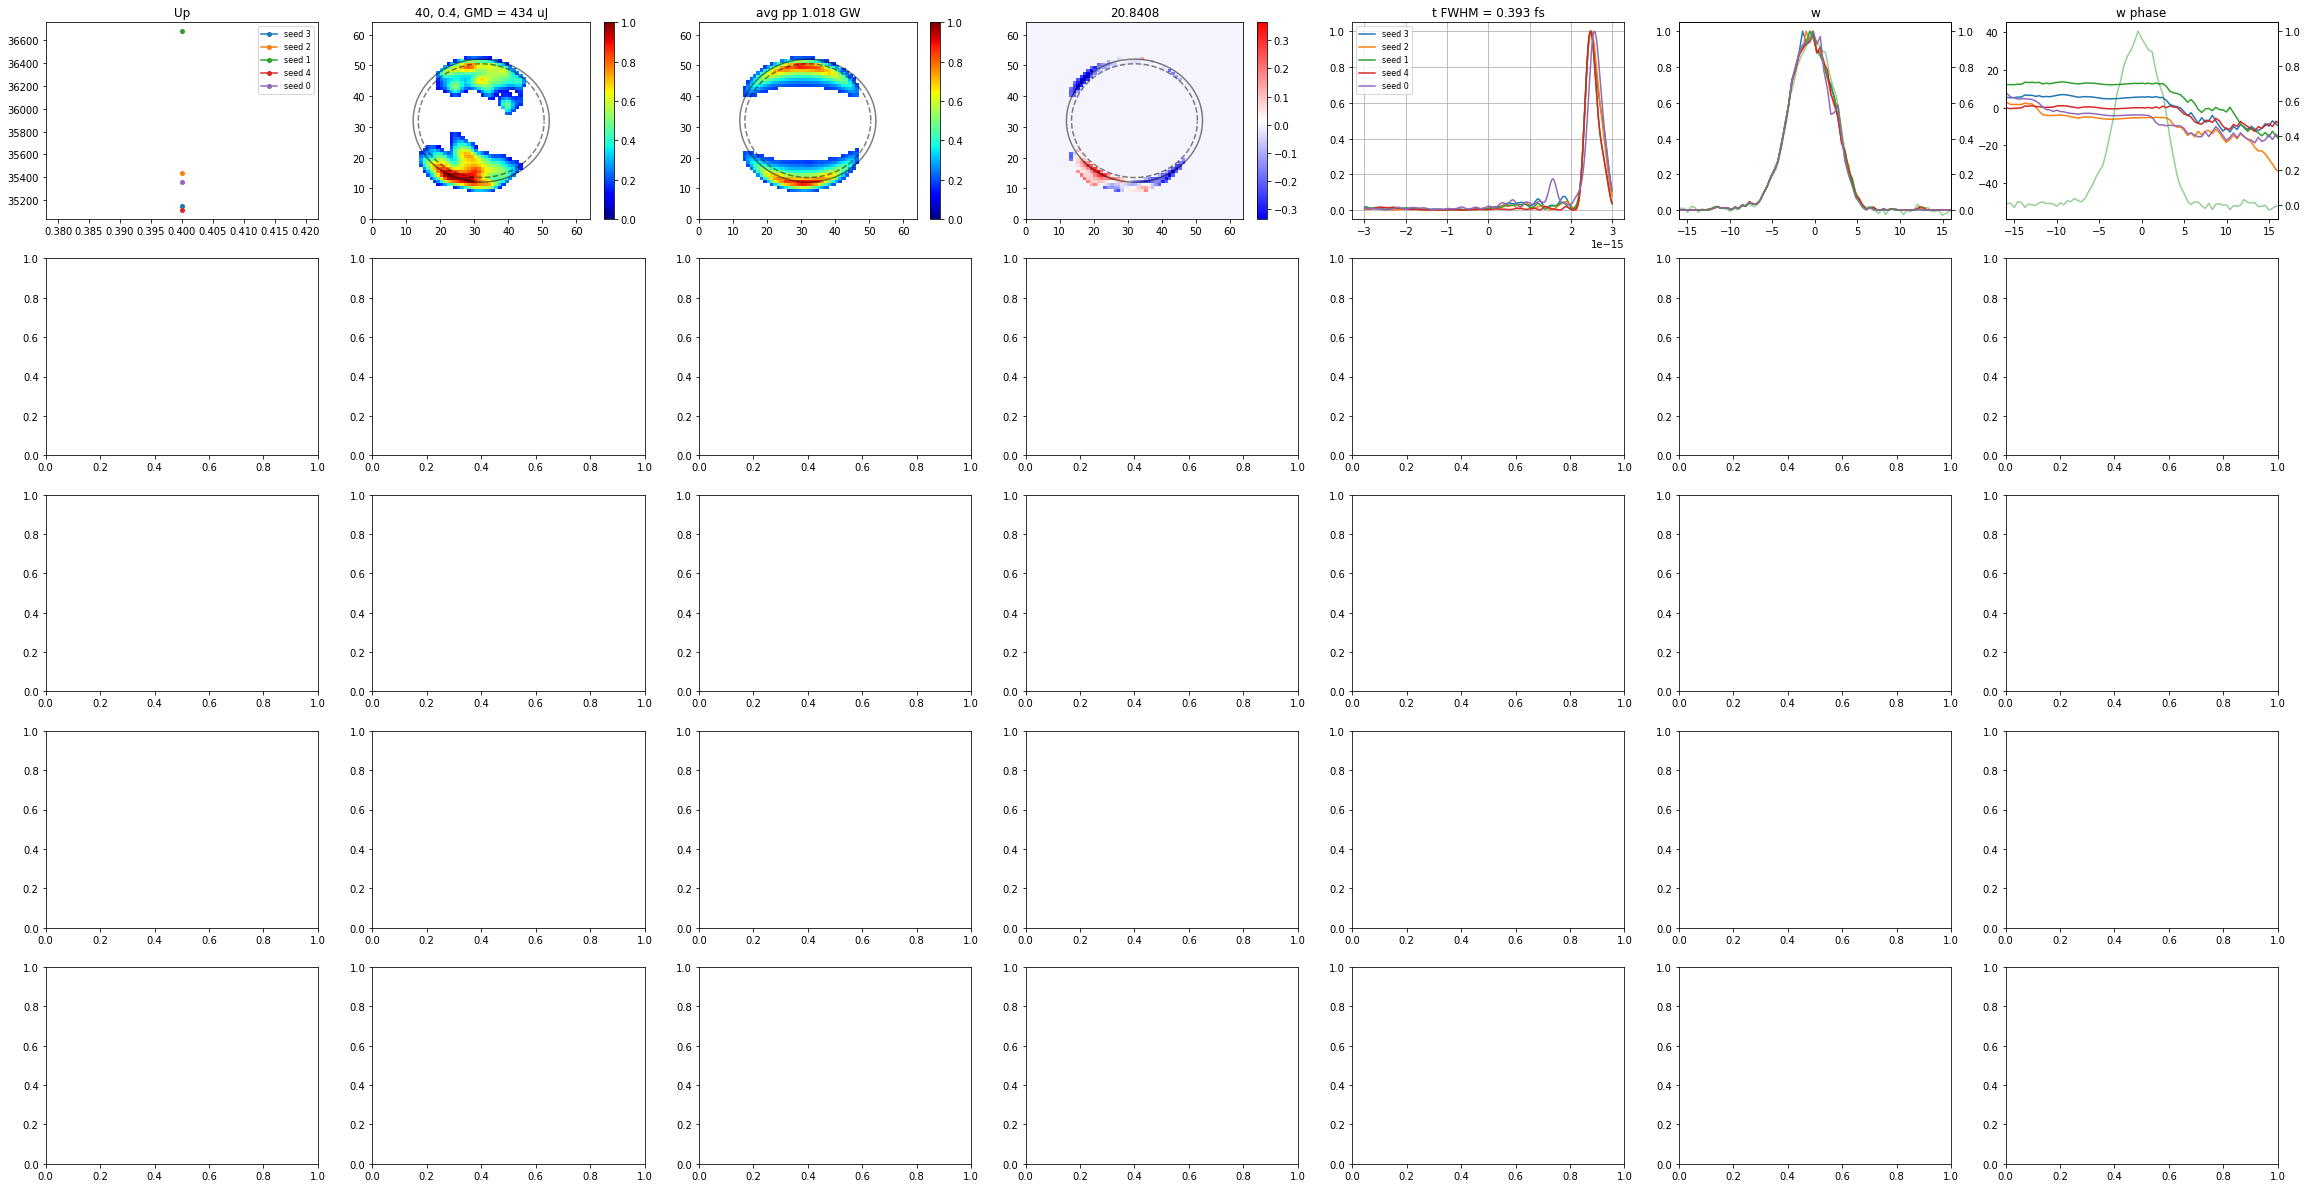

In [309]:
#plot for ppt
fwhms = []
std_t = []
ups_b = []
fwhms_avg = []
fwhms_maxs = []
fwhms2_maxs = []
pps_trunc = []
eshift = np.unique(dat['eshift'])
#IDs = [33, 102, 114, 121, 127, 129, 139, 155, 169, 171, 175, 177, 184, 191, 194, 195, 202]
#IDs = [14,22,30,33,42,47,53,55,56,57,64,70,72,82,85,86,90,93,102,103,104,155]
IDs = np.unique(dat['ID'])
#IDs = [2,4,6,7,10,11,15,17,18,19,20,22,25,26,29,30,32,33,34,35,37,40,41,50,51,52,53,54,55,57,60,61,67,69,70,75, 76,77,81,82,85,88,90,91,92,94,98,100,102,103,105,109,110,112,114,115,116,117,119,123,126,130,131,133,135,140,141,142]
#IDs = [15, 18, 29, 40, 55, 105, 142]
thresh = dats['thresh']
wr = 1200 #1340
for k in range(int(np.ceil(len(IDs)/5))):
    fig,axs = plt.subplots(nrows = 5, ncols =7, figsize = (40,21))
    for l in range(5):
        try:
            #uplook = dat[(dat['ID'] == IDs[k*5+l])]['Up'][np.argmin(dat[(dat['ID'] == IDs[k*5+l])]['costs'][:,-1])]
            cost_avg = []
            us = []
            for i,u in enumerate(np.unique(dat[(dat['ID'] == IDs[k*5+l])]['Up'])):
                cost_avg.append(np.mean(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == u)]['costs'][:,-1]))
                us.append(u)

            uplook = us[np.argmin(cost_avg)]
            
            u = int(np.where(np.array(Upsall) == uplook)[0])
            seed_order = np.argsort(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['costs'][:,-1])
            seeds = np.unique(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['seed'])
            #seed_order = np.arange(len(seeds))
            duration = []
            ets = []

            for ss in range(len(seeds)):   

                x = dat[(dat['ID'] == IDs[k*5+l])&(dat['seed'] == seeds[seed_order[ss]])]['Up']
                y= dat[(dat['ID'] == IDs[k*5+l])&(dat['seed'] == seeds[seed_order[ss]])]['costs'][:,-1]
                #y= dat[(dat['ID'] == IDs[k])]['costM'][:,-1]
                axs[l][0].plot(x[np.argsort(x)], y[np.argsort(x)], '-o', label = 'seed %1.0f' %seeds[seed_order[ss]])

                if ss == len(seeds)-1:
                    axs[l][0].set_title('Up')
                    axs[l][0].legend(fontsize = 8)


            Bp = Bps[u]
            vNaxis = vNaxiss[u]
            alpha = alphas[u]
            alphw = alphaws[u]
            ts= vNaxis['t_sample']

            t1 = np.argmin((vNaxis['t_sample'] -vNaxis['t'][0])**2) 
            t2 = np.argmin((vNaxis['t_sample'] -vNaxis['t'][-1])**2)


            m = mdat[IDs[k*5+l]]
            spec = specdat[IDs[k*5+l]]
            #spec = np.roll(spec,30)
            m = m/np.sum(m)
            N = 2801
            xf = np.arange(-N/2-1/2,N/2-1/2,1)/np.abs(vNaxis['t_sample'][0])/2
           # xf = np.arange(-N/2+1/2,N/2+1/2,1)/((vNaxis['t_sample'][-1] - vNaxis['t_sample'][0])) #using tsample range
            eV = 1239.84*(2*np.pi*xf)/2.9979E8/(2*np.pi)*1e-9 
            #Interpolate spec outside of the loop to match eV
            xeV = pix_2_eV(np.arange(1024), pixpereV = 22, spectra_hw0 = 0, spectra_pix0 = 512)
            xeV = xeV - eshift#3 #know this from previous calibration

            for s in range(len(seeds)):

                if len(seeds)>1:
                    Q = np.squeeze(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['Qs'][seeds[seed_order[s]],:])
                else:
                    Q = np.squeeze(dat[(dat['ID'] == IDs[k*5+l])&(dat['Up'] == uplook)]['Qs'])
                N_basis = 36
                eVshift_idx = 0
                Q1=Q[0:N_basis]
                Q1=np.reshape(Q1,[1,N_basis])
                Q2=np.concatenate(([0],Q[N_basis:2*N_basis-1]))
                Q2=np.reshape(Q2,[1,N_basis])
                Qguess=Q1+1j*Q2
                Qguess=np.reshape(Qguess,[N_basis,1])
                Mgr=np.real(np.matmul(np.matmul(Qguess,Qguess.conj().transpose()).transpose().flatten(),Bp))
                Mgr=Mgr/np.sum(Mgr)
                Mgr[Mgr<thresh] = 0
                Mgr=Mgr/np.sum(Mgr)

                alpha_t = alpha['t_sample']/np.max(np.abs(alpha['t_sample'])) ##take out carrier
                #alpha_t = alpha['t']/np.max(np.abs(alpha['t'])) #alpha_t = alpha_t*np.exp(-1.j*(energy_x)/hbar*np.tile(vNaxis['t'],(N_basis,1)))
                Et = np.squeeze(np.matmul(Qguess.T,alpha_t))

                f = interp1d(vNaxis['t_sample'],Et, fill_value = 0, bounds_error = False)
                Et_l = f(np.linspace(vNaxis['t_sample'][0],-vNaxis['t_sample'][0], len(vNaxis['t_sample'])))
                aghh = np.argmax(np.abs(Et_l))
                Ew = np.fft.ifftshift(np.fft.ifft(np.roll(Et_l,-aghh))) #need this to get imag part, must be evenly spaced
                #Ew = np.squeeze(np.matmul(Qguess.T,alphw))
                EwEw = np.real(Ew*Ew.conj())
                EwEw = EwEw[wr-eVshift_idx:-wr-eVshift_idx]
                EwEw = EwEw/np.max(EwEw)
                wphase = np.unwrap(np.angle(Ew))
                wphase = wphase - np.mean(wphase)
                Ew = np.squeeze(np.matmul(Qguess.T,alphw)) 
                EwEw = np.real(Ew*Ew.conj())
                EwEw = EwEw[wr-eVshift_idx:-wr-eVshift_idx]
                EwEw = EwEw/np.max(EwEw)


    #             aghh = np.argmax(np.abs(Et))
    #             Ew = np.fft.ifftshift(np.fft.ifft(np.roll(Et,-aghh))) #need this to get imag part
    #             #Ew = np.squeeze(np.matmul(Qguess.T,alphw))
    #             EwEw = np.real(Ew*Ew.conj())
    #             EwEw = EwEw[1340-eVshift_idx:-1340-eVshift_idx]
    #             EwEw = EwEw/np.max(EwEw)
    #             wphase = np.unwrap(np.angle(Ew))
    #             wphase = wphase - np.mean(wphase)

                phis = np.linspace(0,359,100)*np.pi/180
                if s == 0:

                    pscale = 1/np.max(m/np.sum(m[:32,:]*mask[:32,:]))
                    Mt = m/np.sum(m[:32,:]*mask[:32,:])*pscale
                    Mp = pscale*np.reshape(Mgr/np.sum(mask[:32,:]*np.reshape(Mgr, [64,64])[:32,:]), [64,64])
                    #Mp = Mp/np.max(Mp)
                    #tosave[str(k) + '_Q'] = Q
                    #tosave[str(k) + '_Up'] = uplook
                    p =axs[l][1].pcolormesh(Mt, cmap = my_cmap,vmax = np.max([np.max(Mp),1]))
                    axs[l][1].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
                    axs[l][1].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
                    plt.colorbar(p, ax = axs[l][1])
                    axs[l][1].set_title(str(IDs[k*5+l])+', '+str(uplook)+', GMD = %1.0f uJ' %(1000*gds[IDs[k*5+l]]))
                    ups_b.append(uplook)

                    p =axs[l][2].pcolormesh(Mp, cmap = my_cmap,vmax = np.max([np.max(Mp),1]))#, vmin = np.min(m), vmax = np.max(m))
                    plt.colorbar(p, ax = axs[l][2])
                    phis = np.linspace(0,359,100)*np.pi/180
                    axs[l][2].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
                    axs[l][2].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)

                    p = axs[l][3].pcolormesh((Mt-Mp)*mask, cmap = 'bwr', vmin = np.min((Mt-Mp)[:32,:]*mask[:32,:]),vmax = np.max((Mt-Mp)[:32,:]*mask[:32,:]))
                    axs[l][3].set_title('%1.4f' %np.sum(np.abs(Mt-Mp)[:32,:]*mask[:32,:]))
                    #p = axs[2].pcolormesh(m-np.reshape(Mgr, [64,64]), cmap = 'bwr')
                    axs[l][3].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
                    axs[l][3].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
                    plt.colorbar(p, ax = axs[l][3])

                    f = interp1d(xeV,spec, bounds_error=False, fill_value = 0)
                    spec_in = f(eV[wr:-wr])
                    ############# spec cal
                    xxx1 = np.arange(len(spec_in))
                    f = interp1d(xxx1, spec_in, fill_value = 0, bounds_error = False)
                    xs = np.linspace((xxx1[0] -np.argmax(spec_in)), (xxx1[-1]-np.argmax(spec_in)), len(xxx1))+np.argmax(spec_in)
                    spec_in = f(xs)
                    #########

                    spec_in=spec_in/np.max(spec_in)
                    ax1 = axs[l][6].twinx()
                    ax1.plot(eV[wr:-wr], spec_in, color= 'tab:green', alpha = 0.5)
                    ax = axs[l][5].twinx()
                    ax.plot(eV[wr:-wr], spec_in, color= 'tab:green', alpha = 0.5)


                axs[l][5].set_title('w')
                #axs[l][4].set_title('t')
                axs[l][5].plot(np.linspace(eV[wr],eV[-wr], len(EwEw)), np.squeeze(EwEw))
                ax.set_ylim(axs[l][5].get_ylim())
                EtEt = np.abs(Et*Et.conj())
                EtEt = EtEt/np.max(EtEt)
                axs[l][4].plot(ts[t1:t2], EtEt[t1:t2],label = 'seed %1.0f' %seeds[seed_order[s]])
                axs[l][4].grid()
                #axs[l][4].set_xlim(-4e-15,4e-15)

                roll_to = np.argmax(EtEt[t1:t2])
                # a,mu,sig = gaus_fit(ts*1e15,np.roll(EtEt, int(len(EtEt)/2)-roll_to))
                # duration.append(2.355*sig)

                duration.append(FWHM(ts[t1:t2]*1e15,np.roll(EtEt[t1:t2], int(len(EtEt[t1:t2])/2)-roll_to)))
                ets.append(EtEt)

                axs[l][6].set_title('w phase')

                axs[l][6].plot(eV[wr-eVshift_idx:-wr-eVshift_idx], wphase[wr-eVshift_idx:-wr-eVshift_idx])
                mid = int(len(eV[wr-eVshift_idx:-wr-eVshift_idx])/4)
                if s == 0: ymin,ymax = np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]),np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
                if s>0: 
                    if np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]) < ymin: ymin = np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
                    if np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]) > ymax: ymax = np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
                axs[l][6].set_ylim(ymin,ymax)
                if s == len(seeds)-1: axs[l][4].legend(fontsize = 8)
           # axs[l][4].set_title('t FWHM = %1.3f fs, Power = %1.3f TW' %(np.mean(duration),pp)) 
            axs[l][4].set_title('t FWHM = %1.3f fs' %(np.mean(duration))) 
            axs[l][5].set_xlim(-16,16)
            axs[l][6].set_xlim(-16,16)
            EtEtm = np.mean(ets,axis = 0)
            EtEtmax = np.max(ets,axis = 0)
            fwhms2_maxs.append(FWHM2(ts[t1:t2]*1e15,np.roll(EtEtmax[t1:t2], int(len(EtEtmax[t1:t2])/2)--np.argmax(EtEtmax[t1:t2]))))
            fwhms.append(np.mean(duration))
            fwhms_avg.append(FWHM(ts*1e15, np.roll(EtEtm[t1:t2], int(len(EtEtm[t1:t2])/2)-np.argmax(EtEtm[t1:t2]))))
            fwhms_maxs.append(FWHM(ts*1e15, np.roll(EtEtmax[t1:t2], int(len(EtEtm[t1:t2])/2)-np.argmax(EtEtm[t1:t2]))))
            std_t.append(np.sum(np.std(np.array(ets),axis = 0)))

            EtEtm[EtEtm<0.1*np.max(EtEtm)] = 0
            pps_trunc.append(peak_power(EtEtm,vNaxis['t_sample'],gds[IDs[k*5+l]]))
            axs[l][2].set_title('avg pp %1.3f GW' %pps_trunc[-1])
        except:
            print()
    plt.show()

(100, 300)

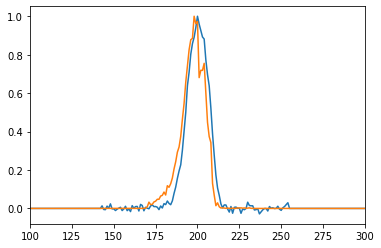

In [245]:
plt.plot(spec_in)
plt.plot(EwEw)
plt.xlim(100,300)

In [252]:
np.sum(np.abs(70*(EwEw-spec_in)/(spec_in+0.1))**2)

43739.100121838535

In [249]:
np.sum(np.abs(14*(EwEw-spec_in))**2)

153.29006713920353

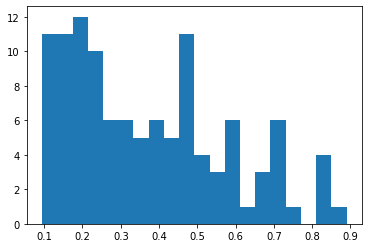

In [80]:
plt.hist(pps_trunc, bins = 20);

In [210]:
! mkdir /reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Aug10_112_half0

In [127]:
tmstmp[[49,74,82,84,85,87,92,93,96,97,105,106,107,108,109,112,116,117,122,123,126,127,130,134,138,141,142,144,146,147,149,150,160,191,197,198,203,206,210,212,213,215,221,225,239,241,243,246,259,261,263,266,268,272,277]]

array([4410466500189199731, 4410466526673217253, 4410466573846689349,
       4410466594694478956, 4410466594902752439, 4410466599730396895,
       4410466616092115801, 4410466616225416073, 4410466620736521535,
       4410466620753167685, 4410466638006438656, 4410466641834527680,
       4410466651198312359, 4410466654584819656, 4410466668401644880,
       4410466671896548760, 4410466684855376363, 4410466684972030485,
       4410466706362196223, 4410466715076649980, 4410466715443127424,
       4410466715459904646, 4410466719921071658, 4410466732255078812,
       4410466745388756526, 4410466749616615294, 4410466750007996427,
       4410466753502900307, 4410466753627943040, 4410466758313898613,
       4410466762749899792, 4410466766536307905, 4410466860891247524,
       4410467157315318992, 4410467200601981787, 4410467209016018412,
       4410467226635242539, 4410467239018794927, 4410467281855618456,
       4410467286524796807, 4410467286616416168, 4410467311800461126,
       4410467337859

In [101]:
tmstmp[[14,22,30,33,42,47,53,55,56,57,64,70,72,82,85,86,90,93, 102, 103, 104,155]]

array([4410466500189199731, 4410466526673217253, 4410466573846689349,
       4410466594902752439, 4410466616733582400, 4410466625389315880,
       4410466638006438656, 4410466651198312359, 4410466654584819656,
       4410466668401644880, 4410466684855376363, 4410466715076649980,
       4410466715459904646, 4410466745388756526, 4410466749616615294,
       4410466750007996427, 4410466753627943040, 4410466762749899792,
       4410466860991124424, 4410466861457740912, 4410466865519007108,
       4410467363985340688], dtype=uint64)

In [125]:
for ti in [4410466500189199731, 4410466526673217253, 4410466573846689349,
       4410466594902752439, 4410466616733582400, 4410466625389315880,
       4410466638006438656, 4410466651198312359, 4410466654584819656,
       4410466668401644880, 4410466684855376363, 4410466715076649980,
       4410466715459904646, 4410466745388756526, 4410466749616615294,
       4410466750007996427, 4410466753627943040, 4410466762749899792,
       4410466860991124424, 4410466861457740912, 4410466865519007108,
       4410467363985340688]:
    print(np.where(tmstmp == ti)[0][0])

49
74
82
85
95
99
105
107
108
109
116
123
127
138
141
142
146
149
161
162
163
225


In [ ]:
timestamps = np.load('/cds/home/p/paris/reconVMI_clean/recon X510 Dec/tmpstmps_Aug3_127.npy')

In [ ]:
IDs

In [75]:
timestamps[[9,11,13,15,16,18,21,22,24,25,27,28,40,45,50,51,54,58,59,60,62,139,146]]

array([4410497712253930751, 4410497716132220369, 4410497729509298874,
       4410497729576014546, 4410497729601049307, 4410497737457767587,
       4410497738016265580, 4410497742069667453, 4410497742469699341,
       4410497746323085270, 4410497755121818353, 4410497763920551436,
       4410497854069521282, 4410497918261645382, 4410497926568465072,
       4410497926593499833, 4410497930921890861, 4410497995441170790,
       4410497999686331068, 4410498004223388795, 4410498128671937849,
       4410498862686733565, 4410498879768300153])

In [65]:
mdat.shape

(159, 64, 64)

161.984375 -1.158203125 -0.458984375
-36543.3515625 -16.95703125 22.6875
-62338.228515625 -15.033203125 -0.88671875
-11410.109375 -186.58203125 -38.1875
-55235.494140625 -3.0625 -40.701171875
-39381.046875 -76.388671875 -93.498046875
-14781.970703125 1.6875 -227.30078125
-24733.7109375 -24.6279296875 -18.560546875
-28052.8359375 1.17578125 -12.22265625
-28290.21484375 -71.158203125 -9.03515625
-43114.5625 -4.8515625 -13.583984375
-23781.587890625 -4.466796875 -3.728515625
-35534.119140625 -33.771484375 -10.341796875
-82882.580078125 -12.685546875 0.083984375
-76325.91015625 -9.080078125 -12.123046875
-45807.90625 53.953125 -15.34375
-16287.71875 -16.94140625 -0.515625
-41789.33203125 -98.7109375 -92.57421875
-54689.3359375 -0.21875 0.2890625


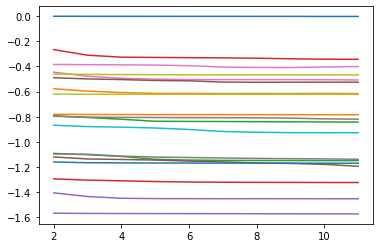

In [33]:
for i in range(19):
    plt.plot(np.arange(2,12),np.log(dat['costMn'][i][2:12]/np.max(dat['costMn'][i])))
    print(np.diff(dat['costMn'][i])[0],np.diff(dat['costMn'][i])[8],np.diff(dat['costMn'][i])[-1])

In [55]:
np.diff(dat['costMn'][i])

array([-7.70199004e+04, -4.35360352e+03, -4.31474609e+02, -1.18669922e+02,
       -5.09179688e+01, -4.01738281e+01, -5.14589844e+01, -1.30058594e+01,
        4.82812500e+00, -3.43710938e+01, -8.97656250e+00,  1.16308594e+01])

In [ ]:
M = m*mask
M[M<0]=0
M = M[:32,:]
M = M/np.sum(M)
plt.pcolormesh(M, cmap = my_cmap)
plt.plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
plt.plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
plt.colorbar()

In [150]:
Mgr=np.real(np.matmul(np.matmul(Qguess,Qguess.conj().transpose()).transpose().flatten(),Bp))
Mgr = np.reshape(Mgr,[64,64])
Mgr = Mgr[:32,:]
Mgr=Mgr/np.sum(Mgr)
#Mgr[Mgr<0.0002506] = 0
#Mgr[Mgr<0.00037] = 0
Mgr[Mgr<0.00032] = 0
Mgr = Mgr/np.sum(Mgr)
Mgr[Mgr<thresh] = 0


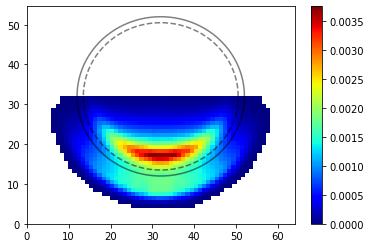

In [149]:
plt.pcolormesh(Mgr, cmap = my_cmap)
plt.plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
plt.plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
plt.colorbar()

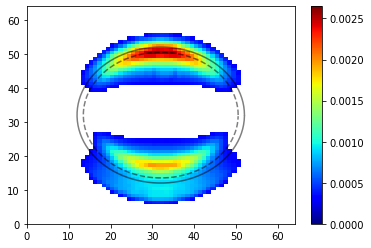

In [127]:
plt.pcolormesh(Mgr, cmap = my_cmap)
plt.plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
plt.plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
plt.colorbar()

In [ ]:
yplt.figure(figsize = (5,5))
n = 47
top = mdat[n][32:,:]
bottom = mdat[n][:32,:]

plt.pcolormesh(mdat[n], cmap = my_cmap)
plt.plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
plt.plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
plt.suptitle('%1.0f, Top: %1.2f, Bottom %1.2f' %(n,np.sum(top)/250,np.sum(bottom)/250))

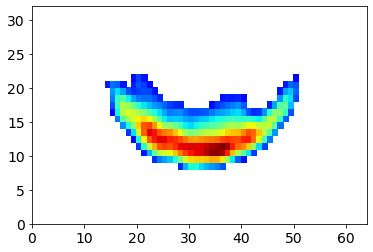

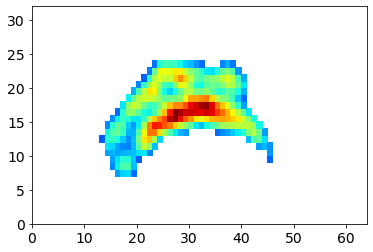

In [24]:
plt.pcolormesh(mdat[45][:32,:], cmap = my_cmap)
plt.show()
plt.pcolormesh(mdat[45][32:,:], cmap = my_cmap)

In [191]:
1239.84*(vNaxis['w'])/2.9979E8/(2*np.pi)*1e-9 

array([-11.73643172, -11.06577848, -10.39512524,  -9.724472  ,
        -9.05381875,  -8.38316551,  -7.71251227,  -7.04185903,
        -6.37120579,  -5.70055255,  -5.02989931,  -4.35924607,
        -3.68859283,  -3.01793958,  -2.34728634,  -1.6766331 ,
        -1.00597986,  -0.33532662,   0.33532662,   1.00597986,
         1.6766331 ,   2.34728634,   3.01793958,   3.68859283,
         4.35924607,   5.02989931,   5.70055255,   6.37120579,
         7.04185903,   7.71251227,   8.38316551,   9.05381875,
         9.724472  ,  10.39512524,  11.06577848,  11.73643172])

In [116]:
! cp '/cds/home/p/paris/reconVMI_clean/recon X510 Jan/streakfind_Jan2023.ipynb' .

In [ ]:
2+2

Text(0.5, 1.0, 'std_t')

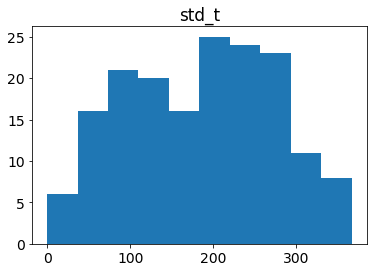

In [105]:
plt.hist(std_t)
plt.title('std_t')

In [34]:
std_t = np.array(std_t)
ups_b = np.array(ups_b)
fwhms = np.array(fwhms)
fwhms_avg = np.array(fwhms_avg)
fwhms_maxs = np.array(fwhms_maxs)
fwhms2_maxs = np.array(fwhms2_maxs)
gds = np.array(gds)

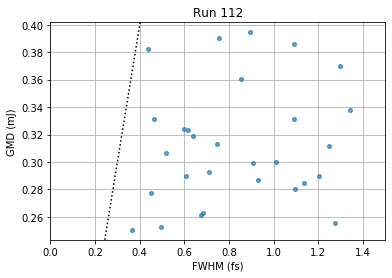

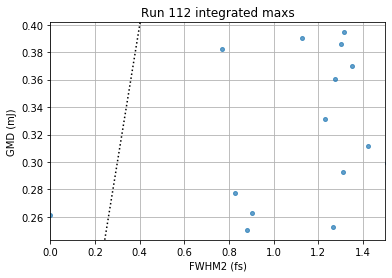

IndexError: boolean index did not match indexed array along dimension 0; dimension is 159 but corresponding boolean dimension is 41

In [36]:
plt.plot(fwhms, gds[IDs], 'o', alpha = 0.7)
plt.xlabel('FWHM (fs)')
plt.ylabel('GMD (mJ)')
plt.xlim(0,1.5)
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.grid()
plt.title('Run 112')
plt.show()

plt.plot(fwhms2_maxs, gds[IDs], 'o', alpha = 0.7)
plt.xlabel('FWHM2 (fs)')
plt.ylabel('GMD (mJ)')
plt.xlim(0,1.5)
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.grid()
plt.title('Run 112 integrated maxs')
plt.show()

for u in np.unique(ups_b):
    std_thresh = 90
    plt.plot(fwhms[(ups_b == u) & (std_t < std_thresh)], gds[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.xlabel('FWHM(fs)')
plt.ylabel('GMD')
plt.xlim(0,1.5)
plt.grid()
plt.show()

for u in np.unique(ups_b):
    std_thresh = 90
    plt.plot(fwhms2_maxs[(ups_b == u) & (std_t < std_thresh)], gds[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.xlabel('FWHM2(fs)')
plt.ylabel('GMD')
plt.xlim(0,1.5)
plt.grid()
plt.show()

for u in np.unique(ups_b):
    
    plt.plot(fwhms_avg[(ups_b == u) & (std_t < std_thresh)], gds[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.xlabel('FWHM avg(fs)')
plt.ylabel('GMD')
plt.xlim(0,1.5)
plt.grid()
plt.show()

for u in np.unique(ups_b):
    
    plt.plot(fwhms_maxs[(ups_b == u) & (std_t < std_thresh)], gds[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.xlabel('FWHM maxs(fs)')
plt.ylabel('GMD')
plt.xlim(0,1.5)
plt.grid()
plt.show()



for u in np.unique(ups_b):
    
    plt.plot(fwhms[(ups_b == u) & (std_t < std_thresh)], fwhms_maxs[(ups_b == u)& (std_t < std_thresh)], 'o', alpha = 0.7, label = 'Up = %1.2f eV' %u)
plt.legend()
plt.ylim(plt.gca().get_ylim()[0],plt.gca().get_ylim()[1])
plt.plot([0,2],[0,2], 'k:')
plt.ylabel('FWHM maxs(fs)')
plt.xlabel('FWHM (fs)')
plt.xlim(0,1.5)
plt.grid()
plt.show()


In [ ]:
plt.pcolormesh(rebin((Mt)), cmap = my_cmap)
plt.colorbar()
plt.show()
plt.pcolormesh(rebin((Mp)), cmap = my_cmap)
plt.colorbar()
plt.show()
plt.pcolormesh(rebin((Mt-Mp)), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.pcolormesh(rebin((Mt-Mp)*mask), cmap = 'bwr')
plt.colorbar()